**Determining which stance is more dominant in Mixed Martial Arts**


***INTRODUCTION***

Mixed Martial Arts (MMA) is quickly becoming very popular and gaining the attention of the masses despite being an extremely violent sport which is why studies to gain a competitive edge is in high demand. In MMA the way a fighter positions themselves (A fighters stance) is very crucial as this will determine what attacks their most susceptible to. Studies show that in MMA fighting, “80.3% of MMA fighters reported using an Orthodox stance with 17.4% reporting a southpaw stance” (Baker, 1) while the rest of the 2.3% reported using a different stance such as the switch stance which is the combination of the two. However, in this study we will be focusing on Southpaw and Orthodox stances since they are the two main stances. Fighters in the Southpaw stance position themselves, so their right hand and right foot are forward, leading with right jabs with their left hand positioned behind to setup up power punches while fighters in the Orthodox stance place their left foot forward, leading with left hand jabs and their right hand is positioned behind for power shot. Basically, Orthodox and Southpaw stances are polar opposites of each other, and we want to determine if either stance will give fighters a competitive edge in a fight which is why the main inferential question, we intend to answer in this report is, “Does a fighters stance affects their win to loss ratio?”

The chosen dataset “All UFC Fighter Stats” (Ab_Rafey) includes relevant data such as the names of all the 3933 UFC fighters that have ever competed in the UFC. UFC is the most well-established MMA organization in the world and the most elite high-level fighters compete inside the UFC which is why this dataset can translate well when it comes to making inferences about the whole population of MMA fighters in the world. The dataset contains each fighter's name, height, weight, reach, and stance along with each fighter's total wins and losses. For this study, we intend on collecting random samples of southpaw and orthodox fighters from the UFC dataset and use the stance, wins, and losses variables to conduct the hypothesis test.



***METHODS & RESULTS***

Due to their being approximately 4x more Orthodox fighters than Southpaw fighters, most fighters are accustomed to fighting against Orthodox fighters which typically causes Orthodox fighters to struggle against Southpaw fighters. This phenomenon is referred to as “The Southpaw Advantage“. Despite the struggles we believe that neither stance provides an advantage over the other and similar studies have also arrived at the same conclusion such as “The Southpaw Advantage? Lateral Preference in Mixed Martial Arts.” (Joseph Baker). However, significant evidence found in our report where one stance is more dominant in MMA can motivate new fighters to adapt the more dominant stance which can impact the whole sport. Potential challenges with our hypothesis are the fact that there could be many other factors that lead to a fighters win/loss ratio other than their stance such as reach, height, fighting style, diet experience, etc. In order to minimize the effect of other factors and ensure stance is the main factor being used to influence the win/loss ratio, we will only take into account fighters that are around the same weight class since they will have similar height and reach. Future questions that could arise from our report are “Can a fighters reach, or height impact their win/loss ratio” and “How would two fighters with the same stance match against each other?”. 

In this code cell we load all the relevant libraries and ensure that our study is reproducible by setting a specific seed for the dataset (201). 

In [1]:
#Load in all the relevant libraries and set the seed
set.seed(201)
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(infer)
library(gridExtra)
library(broom)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




Now we need to load in the dataset and clean and wrangle it. We want to rename columns to more convenient names and collect a smaller sample which we will use to conduct the hypothesis test. Only fighters weighing from 135 lbs to 170 lbs will be considered in the sample to minimize the impact of other variables. To ensure we can conduct a fair hypothesis test, we will take a sample at random by using the sample_n() function and by using a large enough sample size of 400 which is roughly 10% of the total dataset. Fighters who are undefeated will have a win/loss ratio calculated using win/1. 


In [2]:
#Reading the dataset into R
url <- "https://docs.google.com/spreadsheets/d/e/2PACX-1vRqNth1LVjHASdfCmZ-l6xWkvO32Qz_NJqLuZk851y1HNPzM75LPVI5NwBTa8yJWMKAGn11AWbZLjnn/pub?output=csv"
ufc_dataset <- read_csv(url)

#Cleaning and wrangling the dataset and only keeping the relevant columns
ufc_dataset_clean <- ufc_dataset %>%
    #If a fighter has 0 losses, we will only include their wins to calculate their win loss to avoid having infinite value
    mutate("WL_Ratio" = case_when(L > 0 ~ W/L,
                                  L == 0 ~ W/1)) %>%
    rename(weight = "Wt.") %>%
    filter(weight <= 170, weight >= 135) %>%
    select(...1, Stance, "WL_Ratio") %>%
    filter(Stance == "Southpaw" | Stance == "Orthodox") %>%
    filter(!is.na(Stance)) %>%
    rename("ID" = ...1)

#Collect a random sample of size 200 of southpaw fighters from original dataset
ufc_southpaw <- ufc_dataset_clean %>%
                          filter(Stance == "Southpaw") %>%
                          sample_n(200)

#Collect a random sample of size 200 of orthodox fighters from original dataset
ufc_orthodox <- ufc_dataset_clean %>%
                          filter(Stance == "Orthodox") %>%
                          sample_n(200)

#Combine the two samples of orthodox and southpaw fighters
ufc_dataset_final <- rbind(ufc_southpaw, ufc_orthodox)

New names:
• `` -> `...1`
Rows: 3933 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): First, Last, Nickname, Ht., Wt., Reach, Stance
dbl (4): ...1, W, L, D
lgl (1): Belt

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Printing original dataset
head(ufc_dataset)

...1,First,Last,Nickname,Ht.,Wt.,Reach,Stance,W,L,D,Belt
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
1,Tom,Aaron,NA,--,155 lbs.,--,NA,5,3,0,NA
2,Danny,Abbadi,The Assassin,"5' 11""",155 lbs.,--,Orthodox,4,6,0,NA
3,Nariman,Abbasov,Bayraktar,"5' 8""",155 lbs.,"66.0""",Orthodox,28,4,0,NA
4,David,Abbott,Tank,"6' 0""",265 lbs.,--,Switch,10,15,0,NA
5,Hamdy,Abdelwahab,The Hammer,"6' 2""",264 lbs.,"72.0""",Southpaw,6,0,0,NA
6,Shamil,Abdurakhimov,Abrek,"6' 3""",235 lbs.,"76.0""",Orthodox,20,7,0,NA


**Table 1**: Original Dataset

In [4]:
#Printing the Dataset we will use for project
head(ufc_dataset_final)

ID,Stance,WL_Ratio
<dbl>,<chr>,<dbl>
3419,Southpaw,2.400000
2297,Southpaw,5.000000
944,Southpaw,1.909091
3112,Southpaw,1.000000
2347,Southpaw,1.888889
2273,Southpaw,1.375000


**Table 2**: Sample of dataset which will be used for report

Now for each stance, we will calculate summary statistics as a part of prelimary results to understand the relation between win/loss and stance on a deeper level. 

In [5]:
#Computing summary statistics of win/loss ratio of each stance
ufc_dataset_summary <- ufc_dataset_final %>%
    group_by(Stance) %>%
    summarize(n = n(), mean_WL = mean(WL_Ratio), sd_WL = sd(WL_Ratio),
             median_WL = median(WL_Ratio), min_WL = min(WL_Ratio), max_WL = max(WL_Ratio), sample_var = var(WL_Ratio))
ufc_dataset_summary

Stance,n,mean_WL,sd_WL,median_WL,min_WL,max_WL,sample_var
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Orthodox,200,3.593358,3.464740,2.6,0.0,29,12.004422
Southpaw,200,3.369666,2.947341,2.5,0.5,22,8.686821


**Table 3**: Summary statistics of sample

Next we will create visualizations of our sample by creating sample distribution for each stance to better understand sample. 

In [6]:
#Set the width and height of plot
options(repr.plot.width = 8, repr.plot.height = 3)

#Compute the mean for southpaw fighters
southpaw_mean <- ufc_dataset_summary %>% 
    filter(Stance == "Southpaw") %>%
    pull(mean_WL)

#Compute the mean of orthodox fighters
orthodox_mean <- ufc_dataset_summary %>% 
    filter(Stance == "Orthodox") %>%
    pull(mean_WL) 

#Plot of sample distribution of southpaw fighters
southpaw_plot <- ufc_dataset_final %>%
    filter(Stance == "Southpaw") %>%
    ggplot(aes(x = WL_Ratio)) +
    geom_histogram(color = "white", fill = "black") +
    geom_vline(xintercept = southpaw_mean, color = "red") +
    ggtitle("Sample Distribution of Southpaw Fighters Win/Loss Ratio") +
    theme(text = element_text(size = 10)) +
    xlab("Win/Loss Ratio") +
    ylab("Count") +
    annotate("text", x = southpaw_mean + 2, y = 40, label = "Southpaw mean" , color="red", size=4)

#Plot of sample distribution of orthodox fighters
orthodox_plot <- ufc_dataset_final %>%
    filter(Stance == "Orthodox") %>%
    ggplot(aes(x = WL_Ratio)) +
    geom_histogram(color = "white", fill = "black") +
    geom_vline(xintercept = orthodox_mean, color = "blue") +
    ggtitle("Sample Distribution of Orthodox Fighters Win/Loss Ratio") +
    theme(text = element_text(size = 10)) +
    xlab("Win/Loss Ratio") + 
    ylab("Count") + 
    annotate("text", x = orthodox_mean + 2.2, y = 50, label = "Orthodox mean" , color="blue", size=4)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



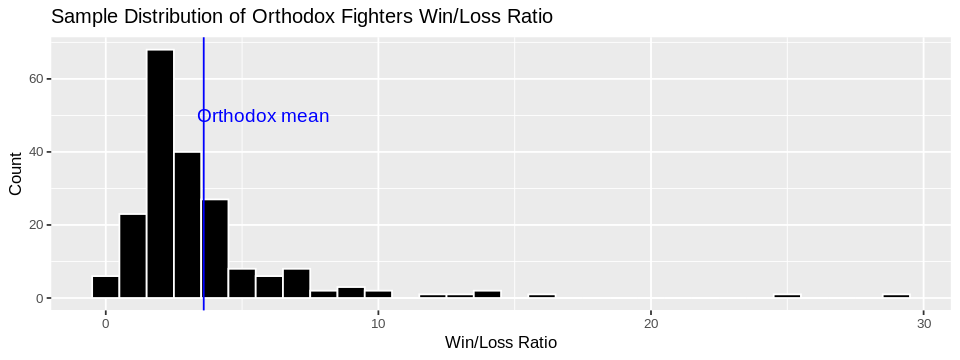

In [7]:
orthodox_plot

**Figure 1**: Sample distribution of Orthodox fighters win/loss ratio

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



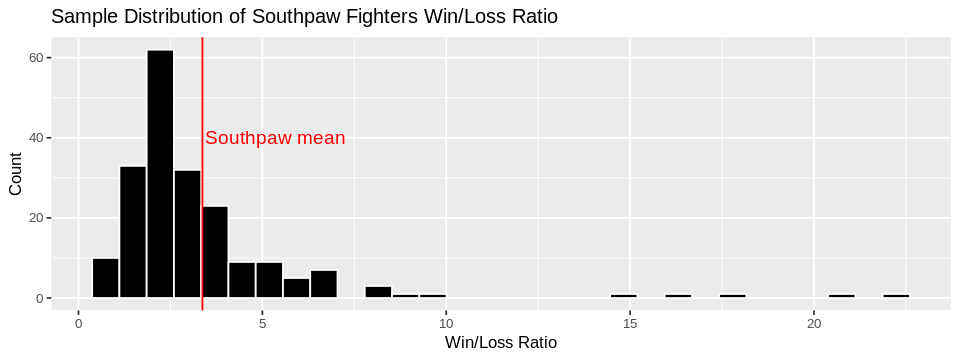

In [8]:
southpaw_plot

**Figure 2**: Sample distribution of Southpaw fighters win/loss ratio

Next we will calculate our observed test statistic in the sample by taking the difference in means of Orthodox and Southpaw fighters. 

In [9]:
#Estimate of our parameter of interest
obs_test_statistic <- orthodox_mean - southpaw_mean
obs_test_statistic 

[1] 0.2236922

Now we will calculate a 95% confidence interval for out population parameter by taking bootstrap samples

In [10]:
#Bootstrapping to obtain a 95% confidence interval
conf_int <- ufc_dataset_final %>%
    specify(formula = WL_Ratio ~ Stance) %>%
    generate(reps = 10000) %>%
    calculate(stat = "diff in means", order = c("Orthodox", "Southpaw")) %>%
    get_confidence_interval(level = 0.95, type = "percentile")

conf_int

Setting `type = "bootstrap"` in `generate()`.



lower_ci,upper_ci
<dbl>,<dbl>
-0.3937569,0.8643256


**Table 4**: Confidence interval for Population Parameter

Our point estimate for this report is the difference in means of the win/loss ratio between Orthodox and Southpaw fighters which we computed to be about 0.224. We also calculated a 95% confidence interval for our population parameter to be between -0.394 to 0.864. This means that we can be 95% confident that our true population parameter will fall between the values of the lower and upper bounds. 

This is taking into account fighters with 0 wins as well as their win/loss ratio will result in 0. We can use the standard deviation of the win/loss ratio to quantify the errors of our estimates. We will establish statistical significance using a 95% confidence interval and significance level of 5% which we will compare to the p-value to reject or not reject the null hypothesis. We chose a significance level of 5% as it is fairly common to have that as the cutoff point, any higher and we could be more at risk of making a type 1 error. Making a type 1 error is our main concern because rejecting the null hypothesis that there is no difference between Southpaw and Orthodox stance can be very misleading for a new fighter. Studies affirming that it's believed that stance doesn't make a difference makes it more likely to make a type 1 error rather than type 2 error due to the fact that we expect there to be basically no difference in both stances. 

Our central hypothesis test is:

    H0: μ1 - μ2 = 0
    
    HA: μ1 - μ2 != 0
    
Where μ1 is the mean of win/loss ratio of Orthodox fighters, and μ2 is the mean of win/loss ratio of Southpaw fighters.


The methods we intend to use in this study involve conducting the hypothesis test using the permutation method by collecting bootstrap samples without replacement and by using a theoretical approach such as a two-sample t-test to determine if there is enough statistical evidence to reject or fail to reject our null hypothesis. The reason we chose a permutation test is because we are calculating the difference in means between two groups to generate a null distribution. We chose to do two different methods to see if there is a significant difference between the two, or if both arrive at the same conclusion. 

Now we will conduct the hypothesis test using the permutation method which involves bootstrapping without replacement. We calculated our observed test statistic to be 0.22 which was the difference in means between the win/loss ratio of Orthodox and Southpaw fighters which we will use to get the p-value for the permutation method. We chose our significance level to be 5% with a confidence interval of 95%. 

We begin the permutation section by taking a random bootstrap samples without replacement of size of 400 using the infer package. Using the infer package, we specify our formula to include the win/loss ratio as the response variable and stance as the explanatory variable. Since we have two groups, we specify null to be “independence” and test with 10,000 reps through permutation. Finally, we calculate the statistic to be the difference in means through Orthodox and Southpaw. We are able to compute the p-value by using get_p_value including our test statistic and calculating it from both directions. Thus giving us a p-value of 0.492.

In [11]:
#Hypothesis Test using permutation method
hypothesis_test <- ufc_dataset_final %>%
    specify(formula = WL_Ratio ~ Stance) %>%
    hypothesize(null = "independence") %>%
    generate(reps = 10000, type = "permute") %>%
    calculate(stat = "diff in means", order = c("Orthodox", "Southpaw"))

#Visualization of null distribution
hypothesis_vis <-  hypothesis_test %>%
    visualize() +
    shade_p_value(obs_test_statistic, direction = "both")

#P value obtained from hypothesis test
p_value <- hypothesis_test %>%
    get_p_value(obs_test_statistic, direction = "both")

head(mean(hypothesis_test$stat))

[1] -0.001749231

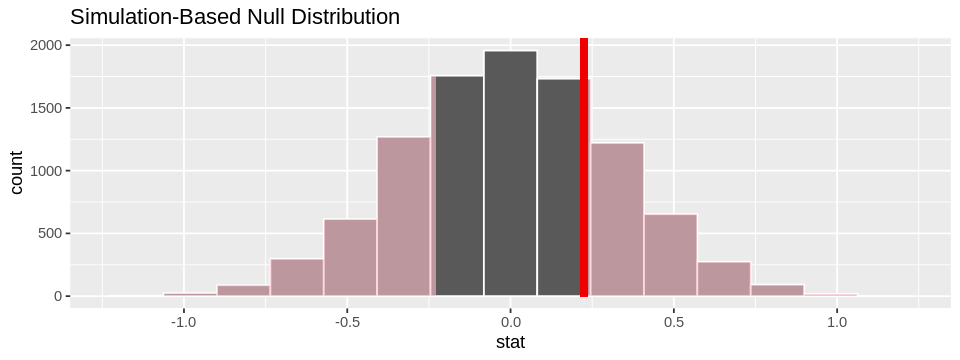

In [12]:
hypothesis_vis

**Figure 3**: Null distribution of difference of win/loss ratio of Orthodox and Southpaw fighters

In [13]:
p_value

p_value
<dbl>
0.4918


**Table 5**: P-value obtained from hypothesis test

The p-value of 0.492 in table 5 leads us to fail to reject H0 since its higher than the pre-determined signifance level of 0.05, meaning that this hypothesis test using the permutation method doesn't provide enough statistical evidence to support the idea that there is a difference in win/loss ratio between each stance.









For our t-test, we use the same total sample size of 400 (200 for each group), selected both of their win/loss ratio and used a two sided test since it is the only appropriate one given our hypothesis test. 

In [14]:
#Two sample T-Test
t_test <- 
    tidy(
        t.test(x = ufc_dataset_final %>%
                   filter(Stance == "Orthodox") %>%
                   select(WL_Ratio),
               y = ufc_dataset_final %>%
                   filter(Stance == "Southpaw") %>%
                   select(WL_Ratio),
               alternative = "two.sided"))

t_test

estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.2236922,3.593358,3.369666,0.6954605,0.487183,388.0245,-0.4086951,0.8560795,Welch Two Sample t-test,two.sided


**Table 6**: Results of two-sample t-test

We believe that the permutation method of bootstrapping without replacement would be more accurate than the two-sample t-test which is an asymptotic method because the permutation method is computer based and the t-test is theory based. Another  reason why the permutation method is better is because it needs has no requirements for the population distribution and hence more applicable to a small sample with an unknown population distribution, whereas the t-test requires normality in the population distribution. However, since our population distribution is roughly normal shaped, the p-value from the t-test of of 0.487 is very similar to the permutation test p-value. Again, leading us to the same conclusion as the permutation method which was failing to reject H0. For our hypothesis test, both the bootstrapping and asymptotic method will do a good job in calculating the p-value. 

***Discussion***

The conclusion arrived through this study was that there is not enough evidence to suggest there is a significant difference between Southpaw and Orthodox fighters win/loss ratio so there isn’t a dominant stance and neither stance gives a serious competitive edge. We conducted two hypothesis tests using the permutation method and the two-sample t-test which yielded p-values of 0.492 and 0.487 respectively. This p-value is very high compared to our alpha of only 0.05 which indicates it is wise to not reject null hypothesis because the chances of the type 1 error are extremely high. We presume that our p-values were so high due to the fact that the difference was extremely negligible. Our results imply that neither stance has an advantage over another. Before conducting the study, we expected there to be little to no difference between each stance, so the results we obtained came as no surprise. The lack of difference in win/loss ratio between the stances can be explained by countless other external factors that determine whether a fighter will win a fight such as their height and reach, fighting style, experience, and diet. This study has helped affirm the consensus amongst the MMA community which is that stance doesn’t make a significant difference in a fighters success. Such studies being done improve the consensus more and ensure that the study is accurate due to its reproducibility. This should encourage fighters to choose a stance that they are comfortable with since stance doesn’t give a significant competitive edge and young fighters should give more weightage to focussing on developing their fighting style instead. Further questions that can arise from our conclusion are, “Is there any other factors that make a fighter more dominant than another?”. We hypothesize that factors such as incorporating good eating habits, lifestyle, or general strength training can possibly play a role in fighters win/loss ratio which would require further studies confirm the validity of. 

***REFERENCES***

Baker, Joseph, and Jörg Schorer. “The Southpaw Advantage? Lateral Preference in Mixed Martial Arts.” PloS One, Public Library of Science, 19 Nov. 2013, https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3834302/. 

McCarter, Nathan. “The Best Records in UFC History.” Bleacher Report, Bleacher Report, 3 Oct. 2017, https://bleacherreport.com/articles/2715483-the-best-records-in-ufc-history.

Ab_Rafey. “All UFC Fighter Stats.” Kaggle, 17 Oct. 2022, https://www.kaggle.com/datasets/abrafey/all-ufc-fighter-stats. 